## Imports

In [66]:
import gzip
from StringIO import StringIO
from urllib import urlopen
import tarfile
from os.path import exists
from os import listdir
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
url = 'http://snap.stanford.edu/data/facebook_combined.txt.gz'
inmemory = StringIO(urlopen(url).read())
with gzip.GzipFile(fileobj=inmemory, mode='rb') as f:
    G = nx.read_edgelist(f)
    print len(G.nodes()), len(G.edges())

(4039, 88234)


In [38]:
if not exists("facebook"):
    with tarfile.open(fileobj=stream_fb_data, mode = 'r|gz') as tar:
        try:
            url_fb_data = 'http://snap.stanford.edu/data/facebook.tar.gz'
            stream_fb_data = urlopen(url_fb_data)
            tar.extractall(path='.')
        except Exception as e:
            print "Error: ", str(e)

In [58]:

for filename in listdir("facebook"):
    if filename.endswith(".edges"):
        content = pd.read_csv(filepath_or_buffer="facebook/"+filename, 
                              delim_whitespace=True, names=['start_node', 'end_node'])
        print "Ego-network of user ", filename.split('.')[0]
        print "Number of edges: ", content.shape[0]
        print "Number of nodes: ", len(set(np.unique(content["start_node"])).union(
            set(np.unique(content['end_node'])))), "\n"
        #with open("facebook/" +filename) as f:
        
    

Ego-network of user  0
Number of edges:  5038
Number of nodes:  333 

Ego-network of user  107
Number of edges:  53498
Number of nodes:  1034 

Ego-network of user  1912
Number of edges:  60050
Number of nodes:  747 

Ego-network of user  698
Number of edges:  540
Number of nodes:  61 

Ego-network of user  686
Number of edges:  3312
Number of nodes:  168 

Ego-network of user  3437
Number of edges:  9626
Number of nodes:  534 

Ego-network of user  414
Number of edges:  3386
Number of nodes:  150 

Ego-network of user  1684
Number of edges:  28048
Number of nodes:  786 

Ego-network of user  3980
Number of edges:  292
Number of nodes:  52 

Ego-network of user  348
Number of edges:  6384
Number of nodes:  224 



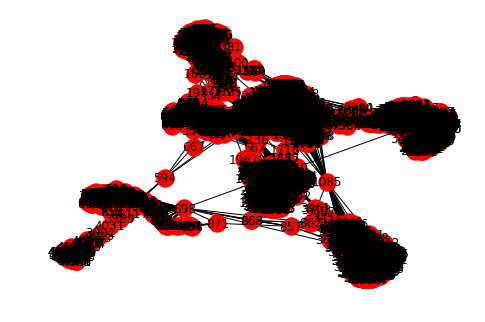

In [68]:
nx.draw(G, with_labels=True)
plt.show()